# Experiment Report

In [336]:
import os
import numpy as np
np.warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [337]:
results = {}

In [338]:
root = "/mnt/storage/log-experiments/"
root_results = "results/focus_sharing_multiple_agents/"
results_paths = ["1/", "2/", "3/", "4/", "5/"]
for results_path in results_paths:
    experiments = [f for f in os.listdir(root+root_results+results_path) if f[-4:] == 'json']
    for exp in experiments:
        exp_name = exp[:-5]
        with open( root+root_results+results_path+exp, 'r') as f:
            data = json.load(f)
            if exp_name in results:
                for metric, values in data.items():
                    results[exp_name][metric].extend(values)
            else:
                results[exp_name] = data                

In [339]:
# checking count of samples
for exp_name, data in results.items():
    print(exp_name, len(data['average_rewards']))
    

dqn_focus_sharing_10 600
dqn_focus_sharing_3 252
dqn_focus_sharing_4 300
dqn_focus_sharing_5 350
dqn_focus_sharing_6 402
dqn_focus_sharing_7 455
dqn_focus_sharing_8 504
dqn_focus_sharing_9 558
dqn_focus_sharing_2 500
dqn_focus_sharing_1 250


In [340]:
# randomly sample 250 out of these?
for exp_name, data in results.items():
    samples = np.random.choice(len(data['average_rewards']), 250)
    for metric, values in data.items():
        results[exp_name][metric] = np.array(values)[samples]

for exp_name, data in results.items():
    print(exp_name, len(data['average_rewards']))


dqn_focus_sharing_10 250
dqn_focus_sharing_3 250
dqn_focus_sharing_4 250
dqn_focus_sharing_5 250
dqn_focus_sharing_6 250
dqn_focus_sharing_7 250
dqn_focus_sharing_8 250
dqn_focus_sharing_9 250
dqn_focus_sharing_2 250
dqn_focus_sharing_1 250


In [341]:
experiments = results.keys()

In [342]:
episode_count = {}
for exp_name in experiments:
    episode_count[exp_name] = results[exp_name]['episodes_to_complete']

In [343]:
for key, data in episode_count.items():
    print("{}: {}".format(key, sorted(data).count(1000)))

dqn_focus_sharing_10: 0
dqn_focus_sharing_3: 1
dqn_focus_sharing_4: 1
dqn_focus_sharing_5: 0
dqn_focus_sharing_6: 0
dqn_focus_sharing_7: 0
dqn_focus_sharing_8: 3
dqn_focus_sharing_9: 0
dqn_focus_sharing_2: 0
dqn_focus_sharing_1: 0


In [344]:
# episode_count

In [345]:
print("means")
for k,v in episode_count.items():
    print(k, np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(k, np.std(v))


means
dqn_focus_sharing_10 142.88
dqn_focus_sharing_3 139.712
dqn_focus_sharing_4 120.324
dqn_focus_sharing_5 124.356
dqn_focus_sharing_6 120.612
dqn_focus_sharing_7 120.936
dqn_focus_sharing_8 133.184
dqn_focus_sharing_9 120.212
dqn_focus_sharing_2 139.2
dqn_focus_sharing_1 283.236

deviations
dqn_focus_sharing_10 90.03271405439249
dqn_focus_sharing_3 94.75309523176539
dqn_focus_sharing_4 74.58033939316715
dqn_focus_sharing_5 60.18602216461891
dqn_focus_sharing_6 49.79338767346524
dqn_focus_sharing_7 45.26318486363945
dqn_focus_sharing_8 104.44178351598559
dqn_focus_sharing_9 36.27681154677186
dqn_focus_sharing_2 85.12884352556424
dqn_focus_sharing_1 168.13809890682123


Use violin plots to show improvements. Violin plots (or regular box plots) will not only show how the average changes, but also the 25 and 75% medians and the overall dispersion of the data. This should show a better picture of how increasing the number of agents affect sharing.

In [346]:
steps_count = {}
for exp_name in experiments:
    steps_count[exp_name] = results[exp_name]['average_steps']

In [347]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
58.72284429925928
69.03595866797964
65.93990498390625
63.08127202034072
58.19148241418808
59.28560124300205
56.50139506603917
56.312780353892556
70.4814809028804
103.91851092003911

deviations
22.645398647955886
26.155474607020555
22.89477467633832
21.458976039529052
20.86404152986063
20.00551898544886
17.250881475055984
17.111757001701417
27.542117037071858
32.70042502210308


In [348]:
rewards_count = {}
for exp_name in experiments:
    rewards_count[exp_name] = results[exp_name]['average_rewards']

In [349]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
58.72284429925928
69.03595866797964
65.93990498390625
63.08127202034072
58.19148241418808
59.28560124300205
56.50139506603917
56.312780353892556
70.4814809028804
103.91851092003911

deviations
22.645398647955886
26.155474607020555
22.89477467633832
21.458976039529052
20.86404152986063
20.00551898544886
17.250881475055984
17.111757001701417
27.542117037071858
32.70042502210308


In [350]:
experiments

dict_keys(['dqn_focus_sharing_10', 'dqn_focus_sharing_3', 'dqn_focus_sharing_4', 'dqn_focus_sharing_5', 'dqn_focus_sharing_6', 'dqn_focus_sharing_7', 'dqn_focus_sharing_8', 'dqn_focus_sharing_9', 'dqn_focus_sharing_2', 'dqn_focus_sharing_1'])

In [351]:
X = []
Y = []
for key, data in episode_count.items():
    int_key = int(key.replace('dqn_focus_sharing_', ''))
    X.extend([int_key] * len(data))
    Y.extend(data)

In [352]:
# sns.violinplot(x=[key] * len(episode_count[key]), y=episode_count[key])
# plt.figure(figsize=(16,8))
# sns.violinplot(x=X, y=Y)
# plt.ylim((100,200))

In [353]:
# ??plt.rcParams

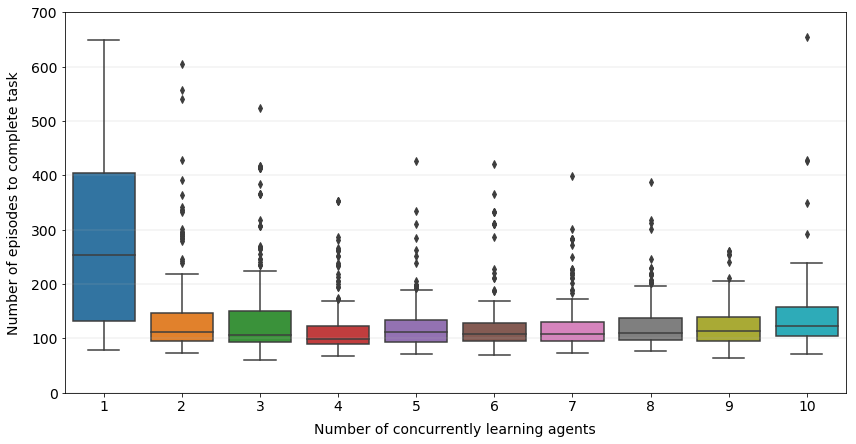

In [389]:

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, 'axes.grid.axis': 'y', "grid.linewidth": 0.25})
plt.figure(figsize=(14,7))
sns.boxplot(x=X, y=Y)
plt.ylim((0,700))
plt.ylabel("Number of episodes to complete task", labelpad=10)
plt.xlabel("Number of concurrently learning agents", labelpad=9)
plt.savefig('multiagentComparison.png', dpi=200, bbox_inches='tight')

In [386]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame(columns=['25% Q', '50% Q', '75% Q'], index=[int(k.replace('dqn_focus_sharing_', '')) for k in episode_count.keys()])
for key,data in episode_count.items():
    int_key = int(key.replace('dqn_focus_sharing_', ''))    
    df.loc[int_key]['25% Q'] = np.quantile(data, 0.25)
    df.loc[int_key]['50% Q'] = np.quantile(data, 0.50)
    df.loc[int_key]['75% Q'] = np.quantile(data, 0.75)
    
# df = df.astype(pd.to_numeric)
df = df.astype(np.int32)
# df = df.round(decimals=1)
# df.style.set_properties(**{'text-align': 'center'})
df = df.sort_index()
df = df.transpose()
df.head(10)


,1,2,3,4,5,6,7,8,9,10
25% Q,132,96,93,90,94,96,95,98,95,105
50% Q,254,111,105,99,112,108,108,110,114,123
75% Q,403,146,149,122,133,128,130,138,139,158


In [384]:
print(df.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  1   &  2   &  3   &  4   &  5   &  6   &  7   &  8   &  9   &  10  \\
\midrule
25\% Q &  132 &   96 &   93 &   90 &   94 &   96 &   95 &   98 &   95 &  105 \\
50\% Q &  254 &  111 &  105 &   99 &  112 &  108 &  108 &  110 &  114 &  123 \\
75\% Q &  403 &  146 &  149 &  122 &  133 &  128 &  130 &  138 &  139 &  158 \\
\bottomrule
\end{tabular}



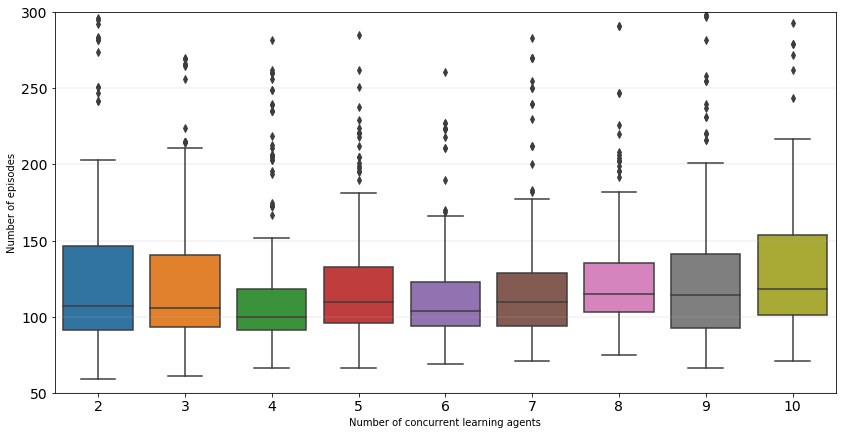

In [334]:

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, 'axes.grid.axis': 'y', "grid.linewidth": 0.25})
plt.figure(figsize=(14,7))
sns.boxplot(x=X, y=Y)
plt.ylim((50,300))
plt.ylabel("Number of episodes", labelpad=10)
plt.xlabel("Number of concurrent learning agents", labelpad=9)
plt.savefig('multiagentComparison2.png', dpi=200, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>